In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import timedelta
%matplotlib inline 

## Load Recording and Events

In [23]:
events = pd.read_csv('data/events_2018-07-04-19-24-04.csv')[['timestamps','events']]
rec = pd.read_csv('data/recording_2018-07-04-19-24-04.csv')[['timestamps','Right AUX']]
events['timestamps'] = pd.to_datetime(events['timestamps'],unit='s')
rec['timestamps'] = pd.to_datetime(rec['timestamps'],unit='s')

In [24]:
events

,timestamps,events
0,2018-07-04 23:23:47.379407000,start
1,2018-07-04 23:24:09.518186999,high voltage
2,2018-07-04 23:24:12.018546000,low voltage
3,2018-07-04 23:24:14.518857000,high voltage
4,2018-07-04 23:24:17.019213000,low voltage
5,2018-07-04 23:24:19.519525000,high voltage
6,2018-07-04 23:24:22.019903000,low voltage
7,2018-07-04 23:24:24.520719999,high voltage
8,2018-07-04 23:24:27.021675000,low voltage
9,2018-07-04 23:24:29.521987000,high voltage


In [25]:
events['timestamps'][2] - events['timestamps'][1]

Timedelta('0 days 00:00:02.500359')

Increments of 2500ms

In [26]:
# Go to last time and add a little buffer.
firstStamp =  rec.iloc[0]['timestamps']
firstStamp

Timestamp('2018-07-04 23:24:12.785000')

In [27]:
lastStamp = events.iloc[-1]['timestamps'] + timedelta(milliseconds=4000)
lastStamp

Timestamp('2018-07-04 23:25:51.037554')

In [28]:
events = events[(events['timestamps'] >= firstStamp) & (events['timestamps'] <= lastStamp)]
rec = rec[(rec['timestamps'] >= firstStamp) & (rec['timestamps'] <= lastStamp)]

In [29]:
events

,timestamps,events
3,2018-07-04 23:24:14.518857000,high voltage
4,2018-07-04 23:24:17.019213000,low voltage
5,2018-07-04 23:24:19.519525000,high voltage
6,2018-07-04 23:24:22.019903000,low voltage
7,2018-07-04 23:24:24.520719999,high voltage
8,2018-07-04 23:24:27.021675000,low voltage
9,2018-07-04 23:24:29.521987000,high voltage
10,2018-07-04 23:24:32.022863000,low voltage
11,2018-07-04 23:24:34.523174999,high voltage
12,2018-07-04 23:24:37.024015000,low voltage


### Note:
* Low voltage (no sound) = highly noisy Right AUX.
* High voltage (loud sound), results in normal looking EEG signal. 

In [30]:
rec.head()

,timestamps,Right AUX
0,2018-07-04 23:24:12.785,998.535
1,2018-07-04 23:24:12.789,998.047
2,2018-07-04 23:24:12.793,999.512
3,2018-07-04 23:24:12.797,999.512
4,2018-07-04 23:24:12.801,999.023


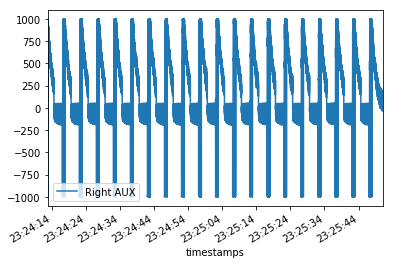

In [31]:
rec.plot(x='timestamps', y='Right AUX')

Note: high difference between holding line voltage low and high.
In the following analysis we will be looking for the transition between high voltage (low / normal EEG value) to low voltage (noisy, giant EEG values).

## Example Calculation: Time Delta of High -> Low Voltage Transition

In [32]:
bufferedStartTime = events['timestamps'][3] + timedelta(milliseconds=175)
eventActualEndTime = events['timestamps'][4]
bufferedEndTime = events['timestamps'][4] + timedelta(milliseconds=175)

In [33]:
# Get the events from a little after the state change until the actual end time. These are our sample that we know should
# represent either voltage high or low. 
samples = rec[(rec['timestamps'] >= bufferedStartTime) & (rec['timestamps'] <= eventActualEndTime)]
samples

,timestamps,Right AUX
489,2018-07-04 23:24:14.695,-114.746
490,2018-07-04 23:24:14.699,44.434
491,2018-07-04 23:24:14.703,-51.758
492,2018-07-04 23:24:14.707,-47.363
493,2018-07-04 23:24:14.711,13.672
494,2018-07-04 23:24:14.715,-83.496
495,2018-07-04 23:24:14.719,9.766
496,2018-07-04 23:24:14.723,-56.641
497,2018-07-04 23:24:14.727,-107.910
498,2018-07-04 23:24:14.730,38.574


In [34]:
mean = samples['Right AUX'].mean()
std = samples['Right AUX'].std()
mean, std

(-63.745281879194536, 71.05153187515472)

In [35]:
# Get the samples from between the actual event end time and a little after - this is where we will find our actual transition event.
endValues = rec[(rec['timestamps'] > eventActualEndTime) & (rec['timestamps'] <= bufferedEndTime)]
endValues

,timestamps,Right AUX
1085,2018-07-04 23:24:17.023,52.246
1086,2018-07-04 23:24:17.027,-111.816
1087,2018-07-04 23:24:17.031,-98.145
1088,2018-07-04 23:24:17.035,10.742
1089,2018-07-04 23:24:17.039,-144.043
1090,2018-07-04 23:24:17.043,5.371
1091,2018-07-04 23:24:17.047,-118.652
1092,2018-07-04 23:24:17.051,-98.633
1093,2018-07-04 23:24:17.054,-315.918
1094,2018-07-04 23:24:17.058,-986.328


In [36]:
outliers = endValues[(np.abs(endValues['Right AUX'] - mean) > (3 * np.abs(std)))]
outliers

,timestamps,Right AUX
1093,2018-07-04 23:24:17.054,-315.918
1094,2018-07-04 23:24:17.058,-986.328
1095,2018-07-04 23:24:17.062,-974.121
1096,2018-07-04 23:24:17.066,-950.684
1097,2018-07-04 23:24:17.070,-974.121
1098,2018-07-04 23:24:17.074,-969.238
1099,2018-07-04 23:24:17.078,-969.238
1100,2018-07-04 23:24:17.082,-969.238
1101,2018-07-04 23:24:17.086,-969.238
1102,2018-07-04 23:24:17.090,-969.238


In [37]:
firstOutlier = outliers.iloc[0]
firstOutlier

timestamps    2018-07-04 23:24:17.054000
Right AUX                       -315.918
Name: 1093, dtype: object

In [38]:
firstOutlier['timestamps'] - eventActualEndTime

Timedelta('0 days 00:00:00.034787')

## Calculate Mean of All High -> Low Voltage Transitions

In [39]:
def get_delta(index):
    bufferedStartTime = events['timestamps'].iloc[index] + timedelta(milliseconds=175)
    eventActualEndTime = events['timestamps'].iloc[index + 1]
    bufferedEndTime = events['timestamps'].iloc[index + 1] + timedelta(milliseconds=175)
    print(eventActualEndTime)
    samples = rec[(rec['timestamps'] >= bufferedStartTime) & (rec['timestamps'] <= eventActualEndTime)]
    mean = samples['Right AUX'].mean()
    std = samples['Right AUX'].std()

    endValues = rec[(rec['timestamps'] > eventActualEndTime) & (rec['timestamps'] <= bufferedEndTime)]
    outliers = endValues[(np.abs(endValues['Right AUX'] - mean) > (3 * np.abs(std)))]
    firstOutlier = outliers.iloc[0]
    return firstOutlier['timestamps'] - eventActualEndTime

deltas = []
for i in range(len(events)):
    if(events.iloc[i]['events'] == 'high voltage'):
        deltas.append(get_delta(i))

deltas

2018-07-04 23:24:17.019213
2018-07-04 23:24:22.019903
2018-07-04 23:24:27.021675
2018-07-04 23:24:32.022863
2018-07-04 23:24:37.024015
2018-07-04 23:24:42.024724
2018-07-04 23:24:47.025408
2018-07-04 23:24:52.026591
2018-07-04 23:24:57.027272
2018-07-04 23:25:02.028447
2018-07-04 23:25:07.029611
2018-07-04 23:25:12.030287
2018-07-04 23:25:17.031462999
2018-07-04 23:25:22.032631
2018-07-04 23:25:27.033309
2018-07-04 23:25:32.033978
2018-07-04 23:25:37.035668
2018-07-04 23:25:42.036849
2018-07-04 23:25:47.037554


[Timedelta('0 days 00:00:00.034787'),
 Timedelta('0 days 00:00:00.034097'),
 Timedelta('0 days 00:00:00.036325'),
 Timedelta('0 days 00:00:00.038137'),
 Timedelta('0 days 00:00:00.040985'),
 Timedelta('0 days 00:00:00.035276'),
 Timedelta('0 days 00:00:00.038592'),
 Timedelta('0 days 00:00:00.032409'),
 Timedelta('0 days 00:00:00.035728'),
 Timedelta('0 days 00:00:00.037553'),
 Timedelta('0 days 00:00:00.032389'),
 Timedelta('0 days 00:00:00.038713'),
 Timedelta('0 days 00:00:00.041537'),
 Timedelta('0 days 00:00:00.039369'),
 Timedelta('0 days 00:00:00.038691'),
 Timedelta('0 days 00:00:00.038022'),
 Timedelta('0 days 00:00:00.039332'),
 Timedelta('0 days 00:00:00.034151'),
 Timedelta('0 days 00:00:00.040446')]

In [40]:
deltasS = pd.Series(deltas)
deltasS.mean()

Timedelta('0 days 00:00:00.037186')